# Explore Fynn Adverse Events Dataset

## Imports

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Get Data

In [59]:
fynn = pd.read_csv("/Users/brandonmurphy/Downloads/fynn_take_home/resident_care_interactions.csv")
# Want to ensure that NaN values are counted in the summary plots below
fynn = fynn.fillna("Missing")

## Helpers

In [94]:
def explore_features(df: pd.DataFrame, feature_name: str):
    
    ### Print the number of feature levels
    print(f"{feature_name} has {df[feature_name].nunique()} levels")
    
    ### Countplot of DataFrame
    print(f"Showing Overall Distribution of {feature_name}")
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=feature_name)
    
    # Relationship of Incident and Features
    
    if feature_name == "interaction_category":
        pass
    else:
        print(f"Feature Distribution when Incident Occurs:  {feature_name}")
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
        sns.countplot(data=df[df["interaction_category"] == "INCIDENT"], x=feature_name)

## Basic Exploration

In [95]:
fynn.head()

,resident_uuid,staff_member_uuid,interaction_category,interaction_type,interaction_timestamp,agitated_vs_calm,combative_vs_agreeable,confused_vs_clear,isolated_vs_sociable,gender,marital_status,oxygen_required,care_type_name,do_not_resuscitate
0,2b204b5a-e431-463c-abe2-65c0b419b8a2,3b27d7cc-567d-4d42-a5d4-3709c2a0703e,HEALTH_CHECKS,Q2 Health Checks,2023-09-01T00:00:00.000Z,1.0,1.0,1.0,1.0,Female,Missing,Missing,Assisted Living,RESUSCITATE
1,2b204b5a-e431-463c-abe2-65c0b419b8a2,3b27d7cc-567d-4d42-a5d4-3709c2a0703e,HOUSEKEEPING,Daily Trash Removal,2023-09-01T00:00:00.000Z,1.0,1.0,1.0,1.0,Female,Missing,Missing,Assisted Living,RESUSCITATE
2,39eb4d00-548d-44ad-89a7-c29c64a414d0,3b27d7cc-567d-4d42-a5d4-3709c2a0703e,HEALTH_CHECKS,Q2 Health Checks,2023-09-01T00:00:00.000Z,1.0,1.0,1.0,1.0,Female,Divorced,Missing,Assisted Living,RESUSCITATE
3,4a4d8588-bf8f-449d-b77c-7d05c7179142,3b27d7cc-567d-4d42-a5d4-3709c2a0703e,HEALTH_CHECKS,Q2 Health Checks,2023-09-01T00:00:00.000Z,1.0,1.0,1.0,1.0,Female,Married,Missing,Assisted Living,DO_NOT_RESUSCITATE
4,57deb30c-3b97-44b4-a8e0-b9bc88d19631,3b27d7cc-567d-4d42-a5d4-3709c2a0703e,HEALTH_CHECKS,Q2 Health Checks,2023-09-01T00:00:00.000Z,1.0,1.0,1.0,1.0,Female,Widowed,Missing,Assisted Living,RESUSCITATE


In [96]:
len(fynn)

311916

#### Unique Residents?

In [97]:
fynn.resident_uuid.nunique()

197

### Unique Staff?

In [98]:
fynn.staff_member_uuid.nunique()

98

### Basic Distribution of Features

### Interaction Category
- Will model to predict incidents (which is very much a minority class)
- Want to understand relationship of each feature with the target variable
    - Worried about spurious correlations due to lack of sample
    - Would likely down/upsample or bootstrap with more time

interaction_category has 8 levels
Showing Overall Distribution of interaction_category


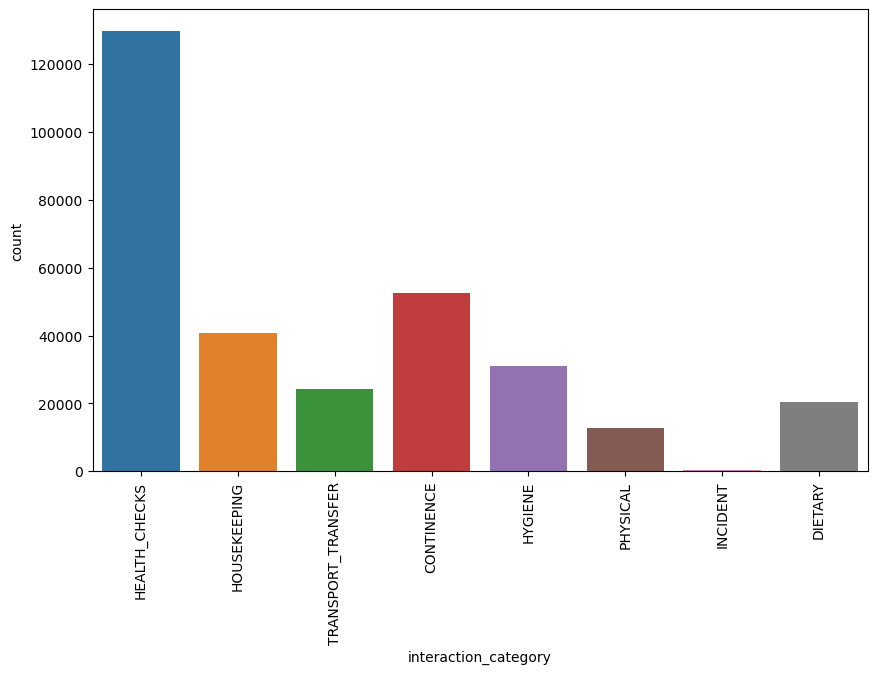

In [100]:
explore_features(fynn, "interaction_category")

### Interaction Type

interaction_type has 41 levels
Showing Overall Distribution of interaction_type


Feature Distribution when Incident Occurs:  interaction_type


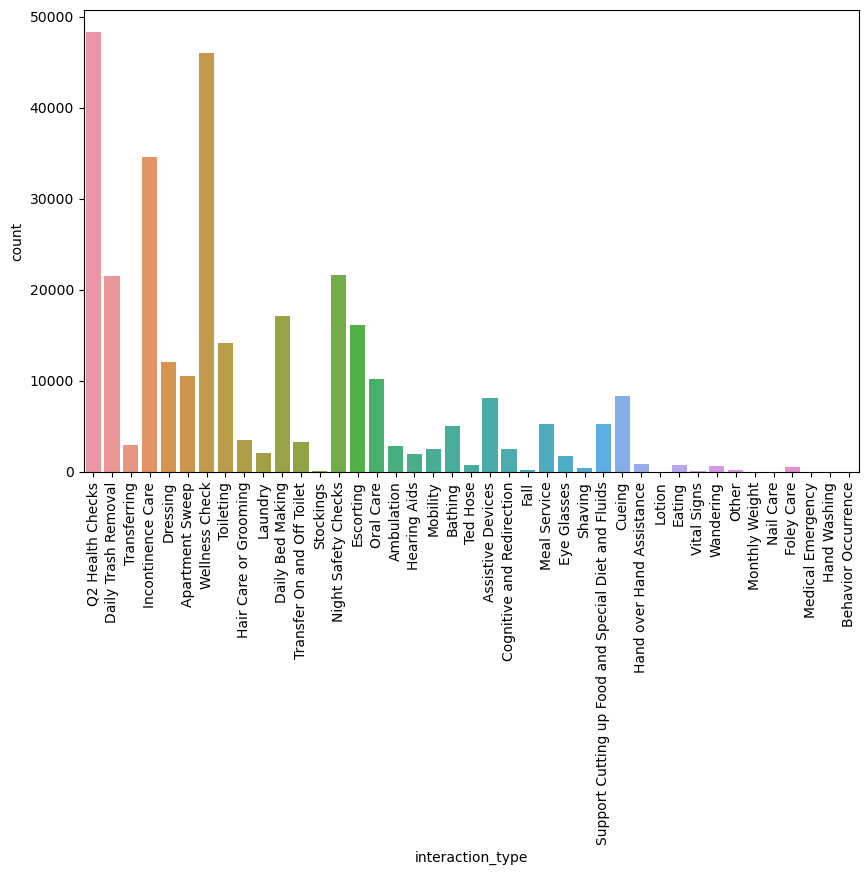

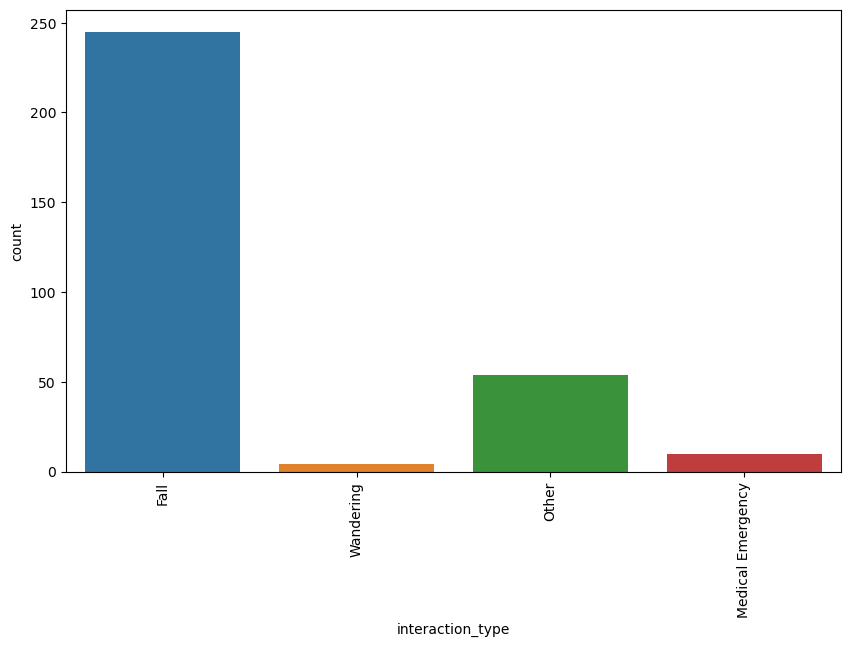

In [101]:
explore_features(fynn, "interaction_type")

### Agitate v. Calm
- Likely need to remove non-integer ratings

agitated_vs_calm has 7 levels
Showing Overall Distribution of agitated_vs_calm
Feature Distribution when Incident Occurs:  agitated_vs_calm


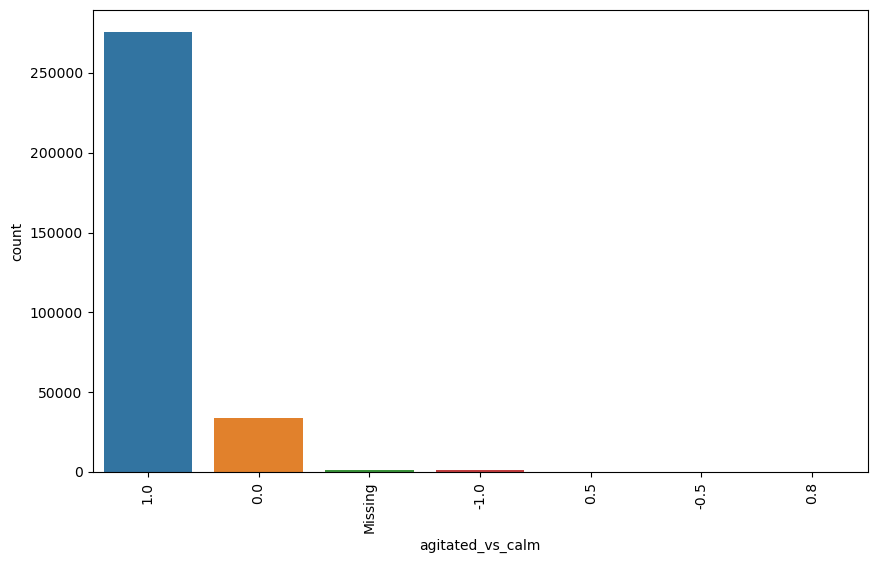

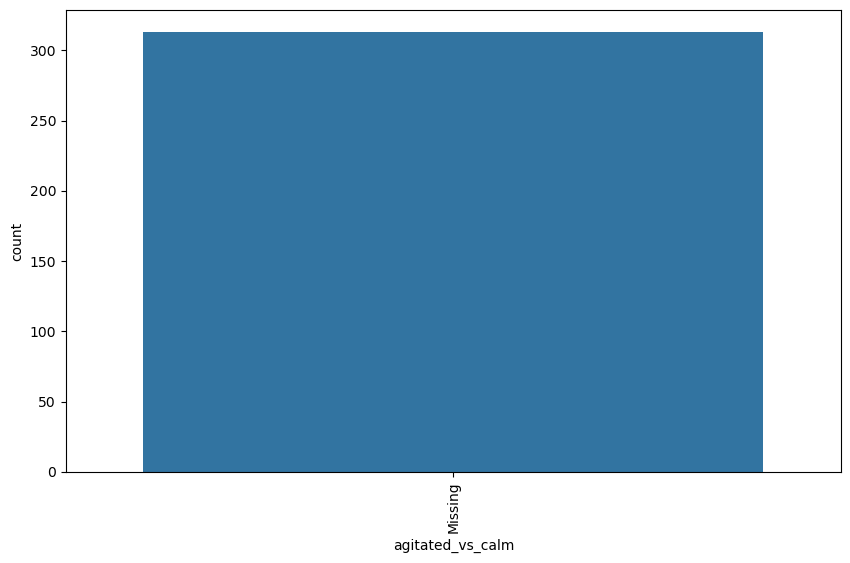

In [102]:
explore_features(fynn, "agitated_vs_calm")

### Combative vs. Agreeable

combative_vs_agreeable has 7 levels
Showing Overall Distribution of combative_vs_agreeable
Feature Distribution when Incident Occurs:  combative_vs_agreeable


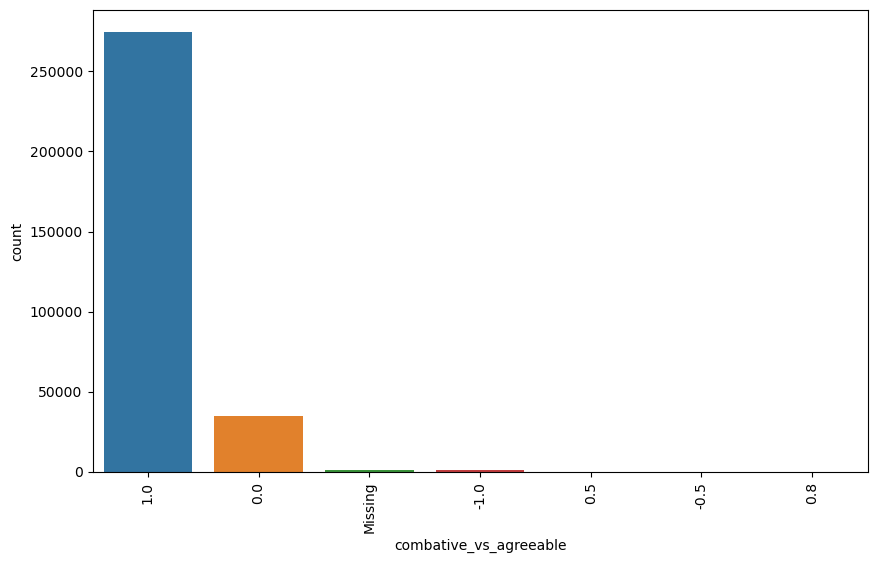

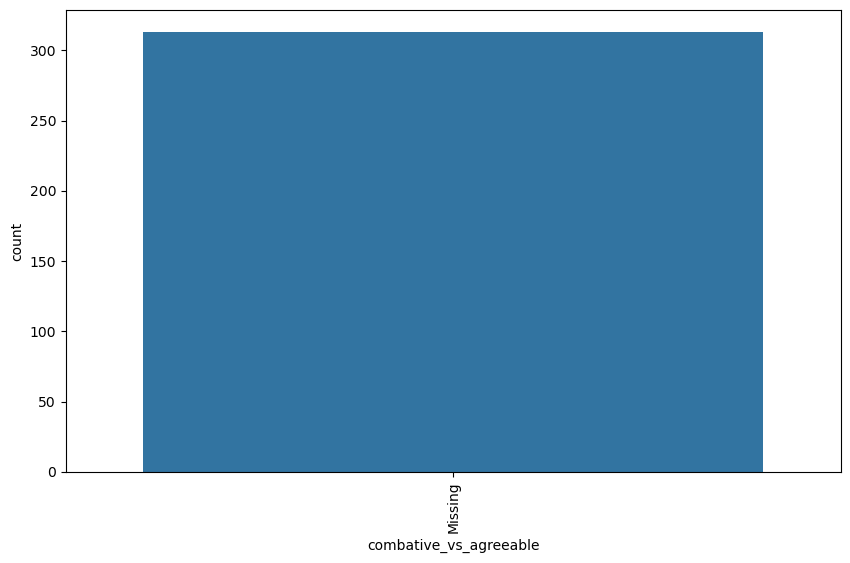

In [103]:
explore_features(fynn, "combative_vs_agreeable")

### Confused vs. Clear

confused_vs_clear has 7 levels
Showing Overall Distribution of confused_vs_clear
Feature Distribution when Incident Occurs:  confused_vs_clear


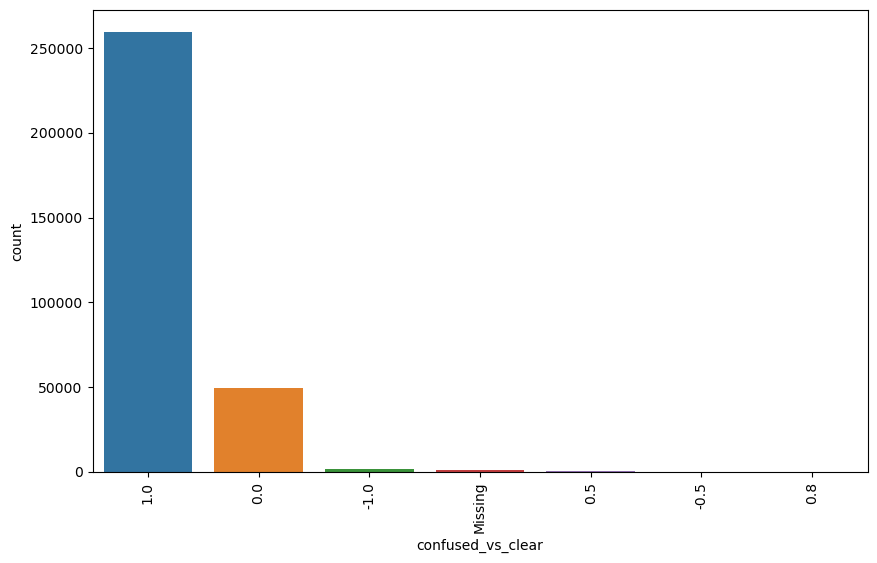

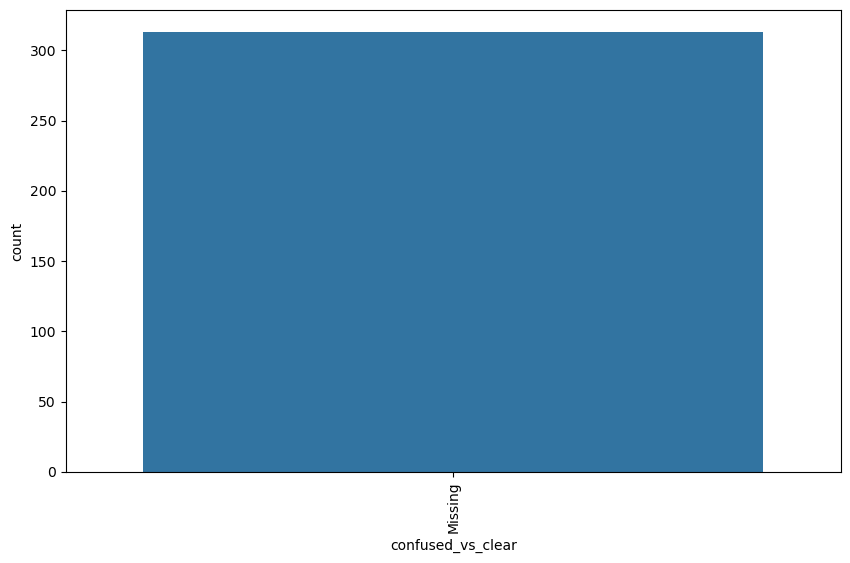

In [104]:
explore_features(fynn, "confused_vs_clear")

### Isolated vs. Sociable 

isolated_vs_sociable has 7 levels
Showing Overall Distribution of isolated_vs_sociable
Feature Distribution when Incident Occurs:  isolated_vs_sociable


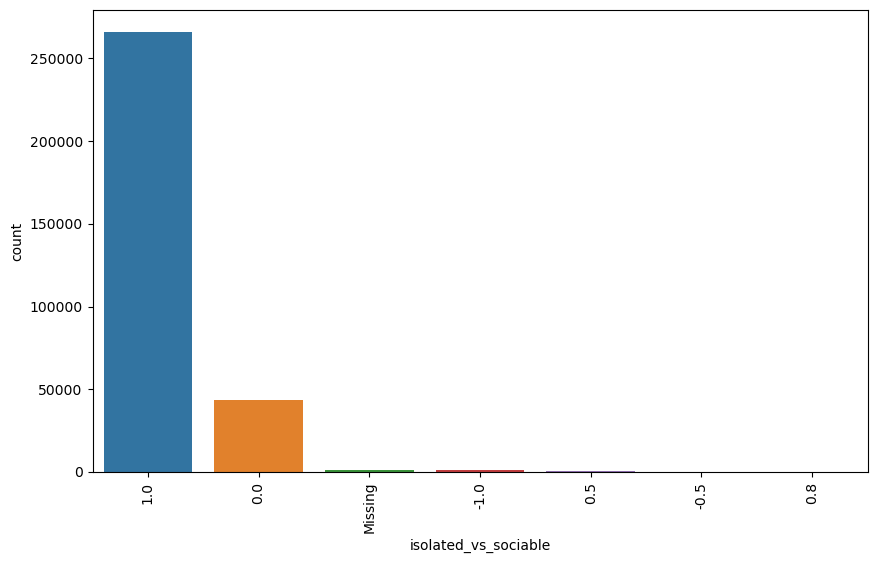

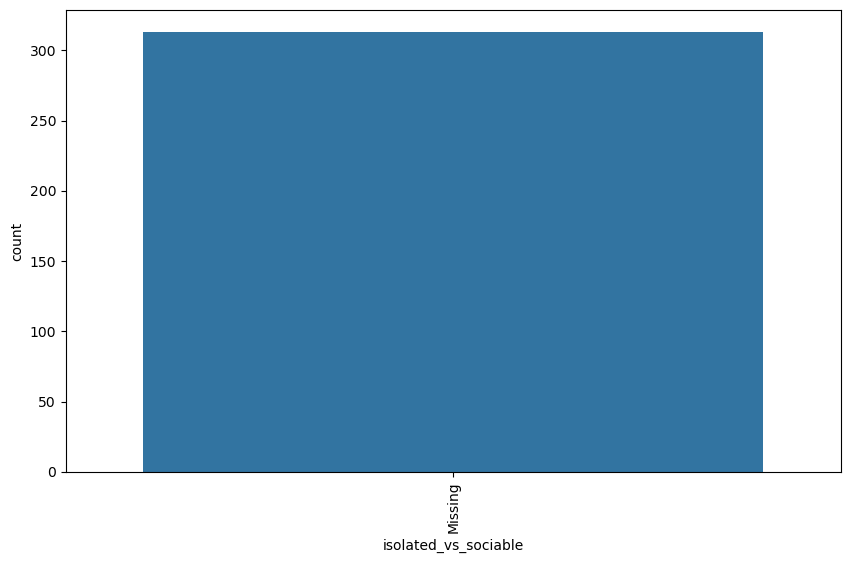

In [105]:
explore_features(fynn, "isolated_vs_sociable")

### Gender

gender has 3 levels
Showing Overall Distribution of gender
Feature Distribution when Incident Occurs:  gender


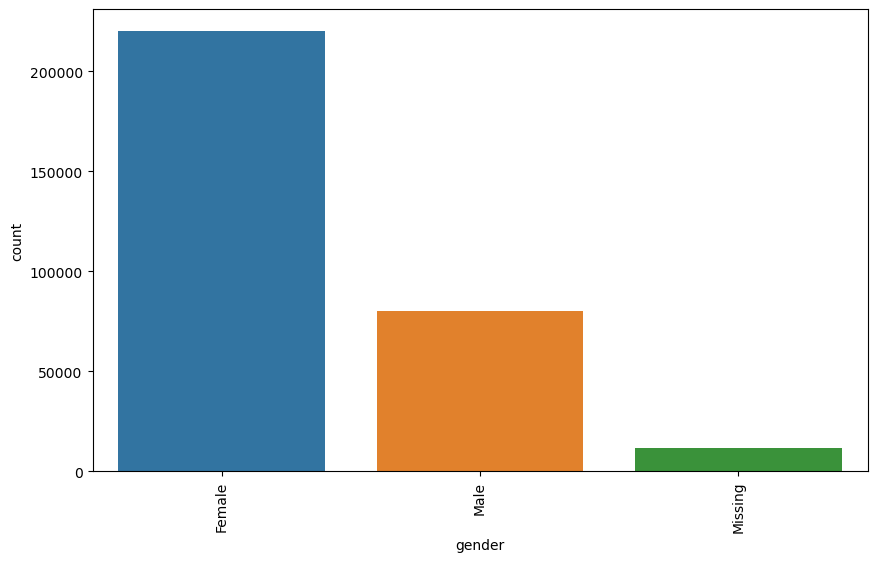

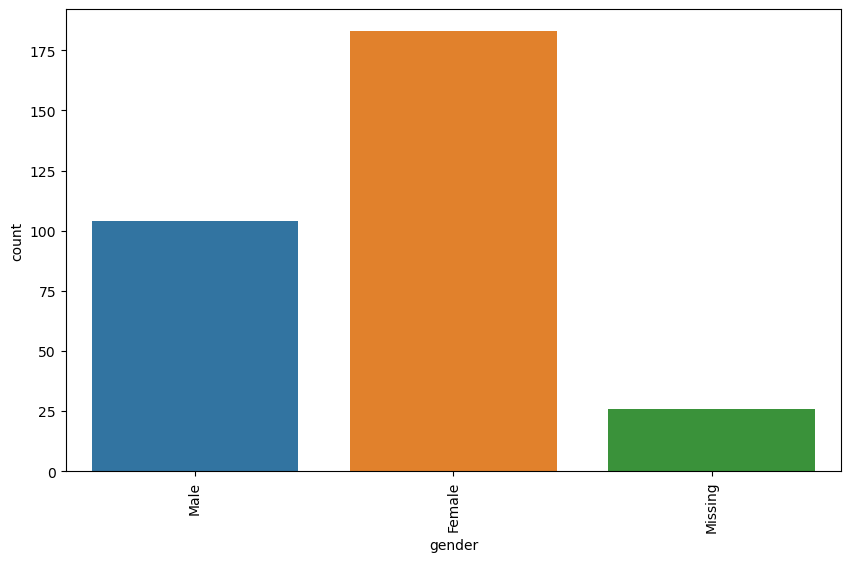

In [106]:
explore_features(fynn, "gender")

### Marital Status

marital_status has 6 levels
Showing Overall Distribution of marital_status
Feature Distribution when Incident Occurs:  marital_status


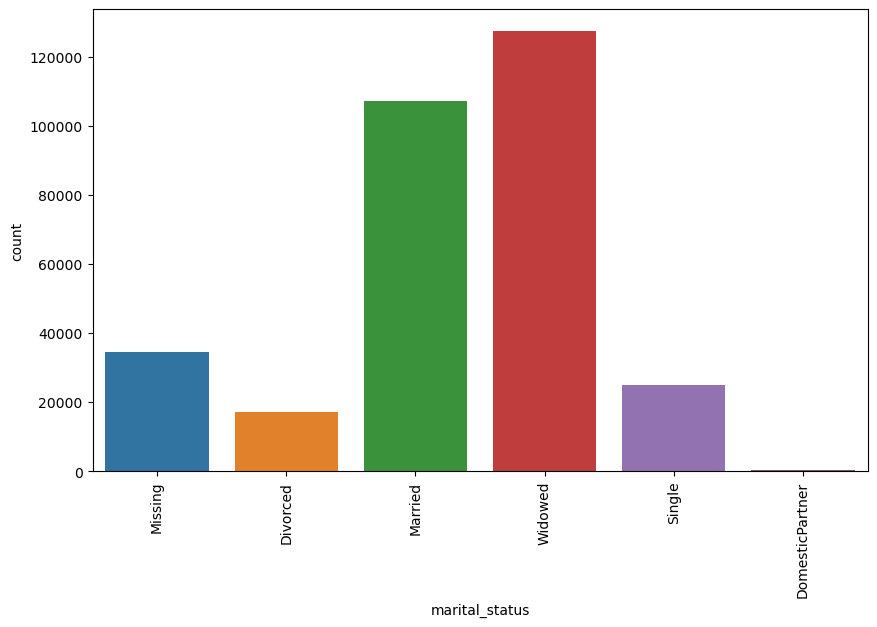

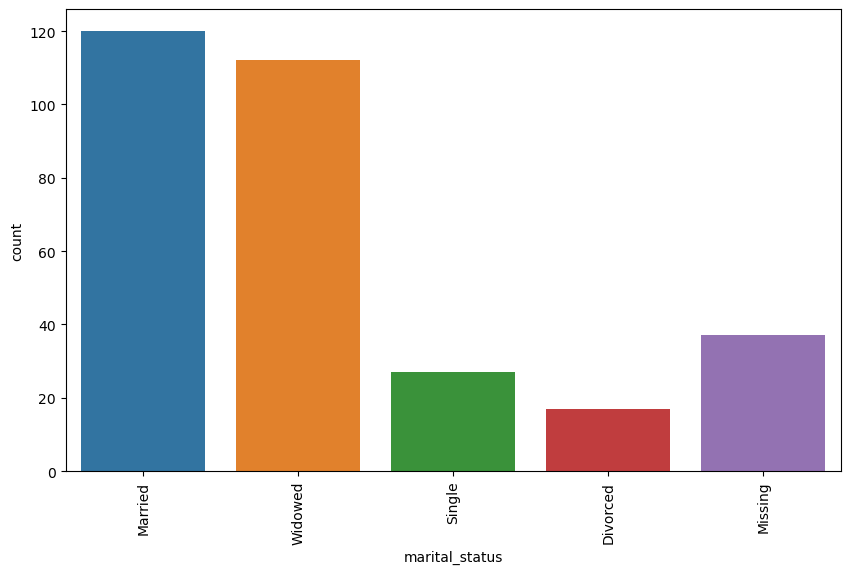

In [107]:
explore_features(fynn, "marital_status")

### Oxygen Required

explore_features(fynn, "oxygen_require")

oxygen_required has 3 levels
Showing Overall Distribution of oxygen_required
Feature Distribution when Incident Occurs:  oxygen_required


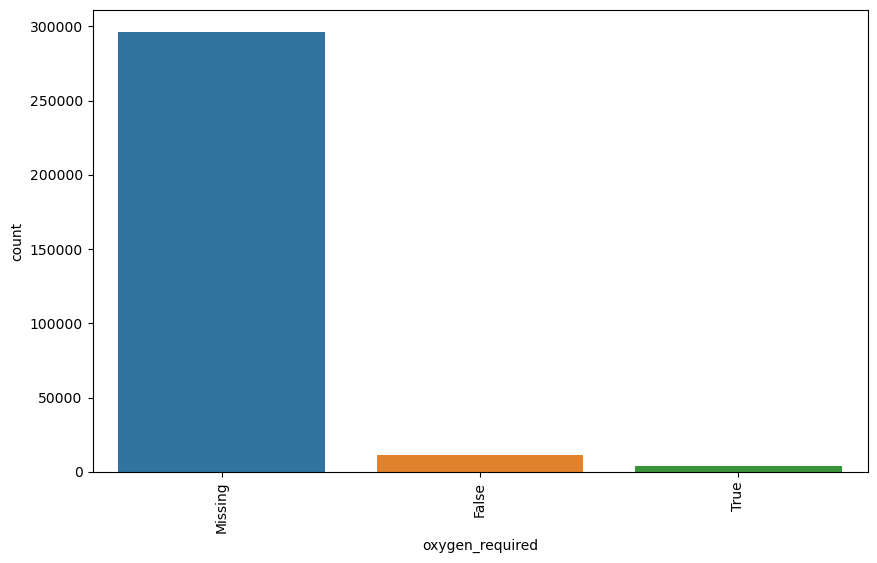

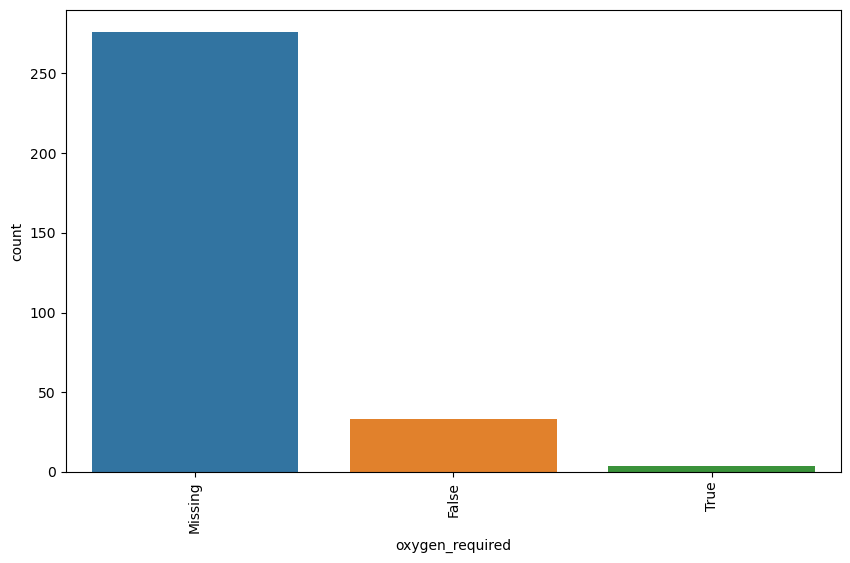

In [108]:
explore_features(fynn, "oxygen_required")

### Care Type

care_type_name has 4 levels
Showing Overall Distribution of care_type_name
Feature Distribution when Incident Occurs:  care_type_name


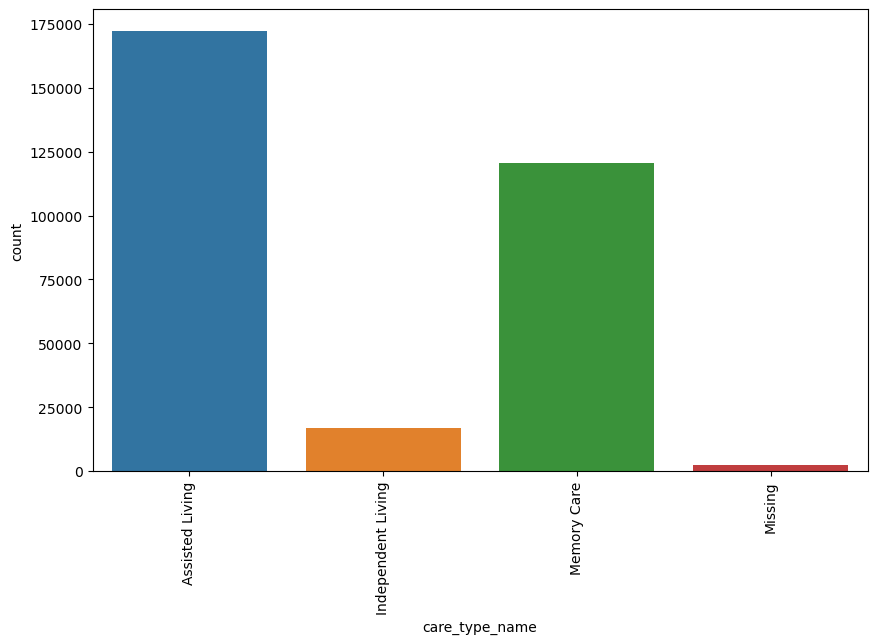

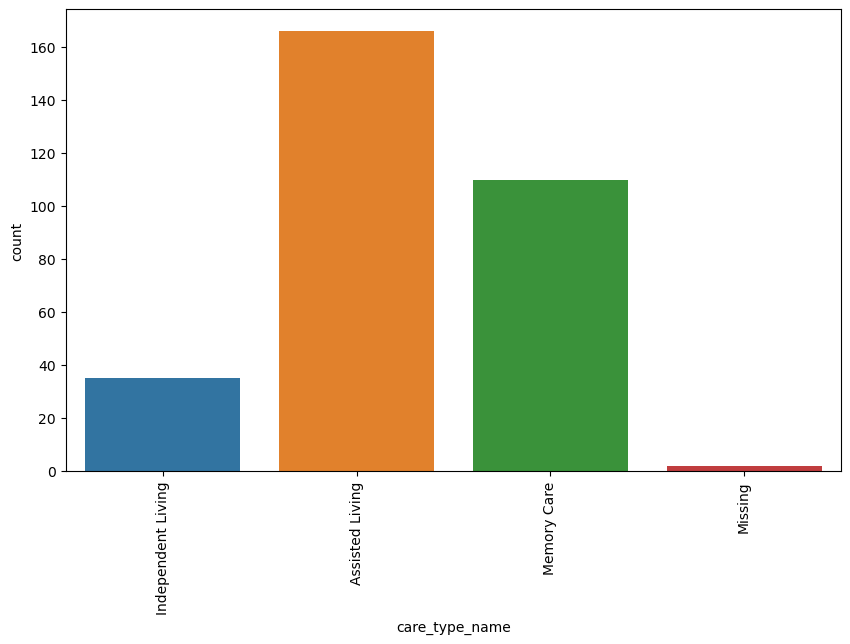

In [109]:
explore_features(fynn, "care_type_name")

### DNR

do_not_resuscitate has 3 levels


Showing Overall Distribution of do_not_resuscitate
Feature Distribution when Incident Occurs:  do_not_resuscitate


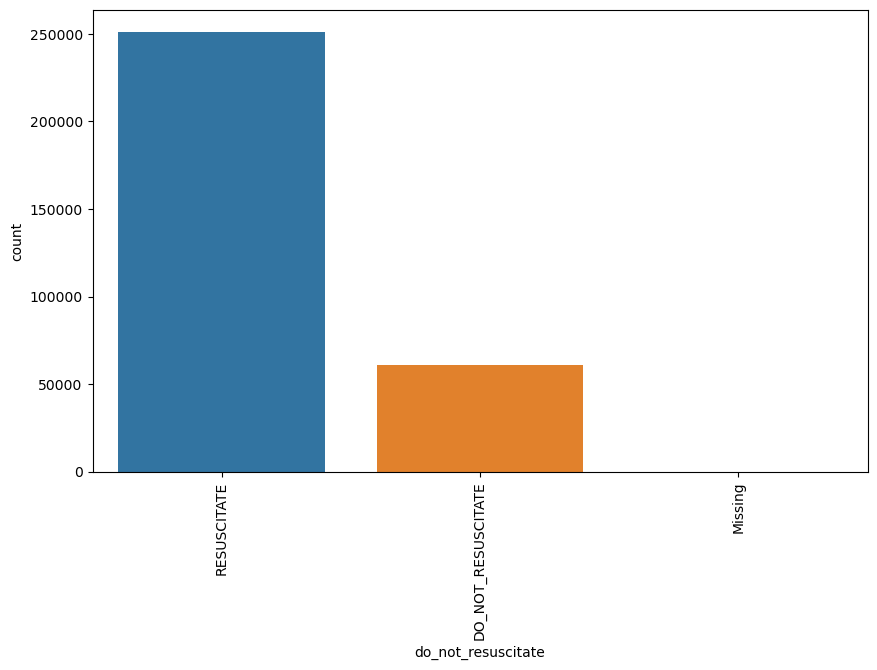

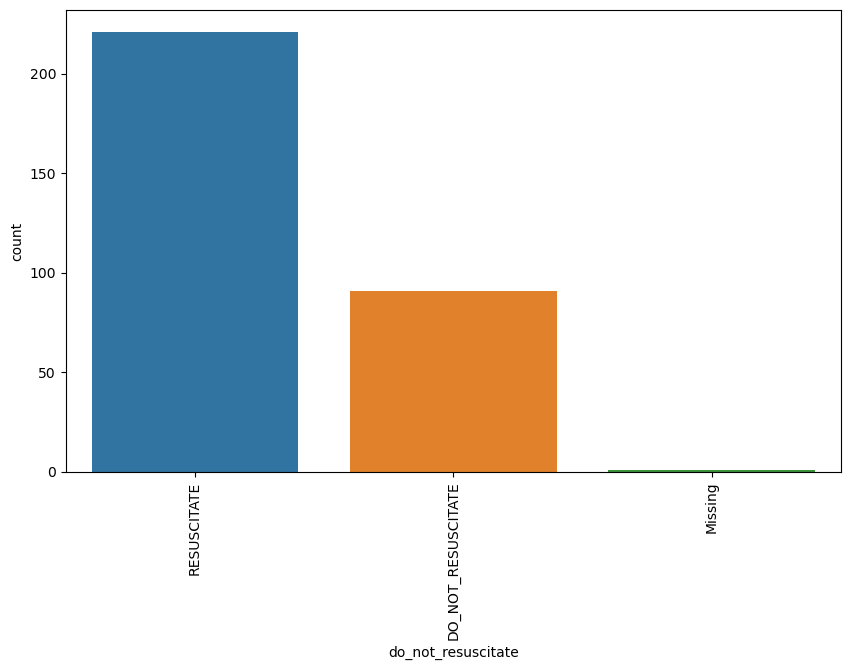

In [110]:
explore_features(fynn, "do_not_resuscitate")